In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
cancer = pd.read_csv("DataModified.csv")

In [4]:
cancer.head()#observing data
print(cancer.describe(include = ['object'])) #observing diagnosis
569-357 #amount of Malignant in df
cancer.drop('id', axis = 1, inplace = True)
cancer.describe()

       diagnosis
count        569
unique         2
top            B
freq         357


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,568.000000,569.000000,569.000000,568.000000,566.000000,568.000000,567.000000,567.000000,567.000000,568.000000,...,567.000000,568.000000,569.000000,569.000000,569.000000,569.000000,568.000000,569.000000,569.000000,569.000000
mean,14.130245,19.289649,105.047821,654.229225,0.096248,0.104354,61.817244,0.048854,0.710289,9.659510,...,16.276118,25.687271,107.261213,880.583128,0.132369,0.254265,0.271431,0.114606,0.290076,0.083946
std,3.526450,4.301036,312.218444,353.150358,0.013971,0.052858,1469.858104,0.038787,12.596692,228.716245,...,4.840100,6.146996,33.602542,569.356993,0.022832,0.157336,0.208023,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,0.800000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.697500,16.170000,75.210000,419.900000,0.086130,0.064815,0.029570,0.020310,0.162000,0.057775,...,13.010000,21.095000,84.110000,515.300000,0.116600,0.147200,0.114475,0.064930,0.250400,0.071460
50%,13.375000,18.840000,86.340000,548.750000,0.095825,0.092525,0.061550,0.033500,0.179300,0.061545,...,14.970000,25.425000,97.660000,686.500000,0.131300,0.211900,0.226550,0.099930,0.282200,0.080040
75%,15.797500,21.800000,104.300000,784.150000,0.105250,0.130425,0.132000,0.073820,0.195800,0.066127,...,18.800000,29.757500,125.400000,1084.000000,0.146000,0.339100,0.381400,0.161400,0.317900,0.092080
max,28.110000,39.280000,7517.000000,2501.000000,0.163400,0.345400,35000.000000,0.201200,300.130000,5451.000000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
cancer.dtypes
#majority of the data is numerical, diagnosis is a response of the numerical predictors

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [34]:
cancer_stats = {'median': [13.375000,18.840000,86.340000,548.750000,0.095825,0.092525,0.061550,0.033500,0.179300,0.061545,0.324200,1.108000,2.287000,24.440000,0.006380,0.020450,0.025890,0.010910,0.018740,0.003162,14.970000,25.425000,97.660000,686.500000,0.131300,0.211900,0.226550,0.099930,0.282200,0.080040], 
        'var': [1.243585e+01,1.849891e+01,9.748036e+04,1.247152e+05,1.951903e-04,2.794014e-03,2.160483e+06,1.504459e-03,1.586766e+02,5.231112e+04,7.690235e-02,3.043159e-01,2.201187e+03,2.070561e+03,9.015114e-06,3.207029e-04,9.111982e-04,3.818335e-05,6.829689e-05,7.009235e-06,2.342657e+01,3.778556e+01,1.129131e+03,3.241674e+05,5.213198e-04,2.475477e-02,4.327355e-02,4.320741e-03,3.827584e-03,3.262094e-04]}

In [39]:
df = pd.DataFrame(cancer_stats, columns = ['median', 'var'], index = ['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst'])
df
#additional stats

,median,var
radius_mean,13.375000,1.243585e+01
texture_mean,18.840000,1.849891e+01
perimeter_mean,86.340000,9.748036e+04
area_mean,548.750000,1.247152e+05
smoothness_mean,0.095825,1.951903e-04
compactness_mean,0.092525,2.794014e-03
concavity_mean,0.061550,2.160483e+06
concave points_mean,0.033500,1.504459e-03
symmetry_mean,0.179300,1.586766e+02
fractal_dimension_mean,0.061545,5.231112e+04


In [58]:
cancer.isna().mean().round(3) # percentage of missing values in each column
#another method
cancer_missing = cancer.isna()
cancer_missing.sum() #number of missing values in each column

diagnosis                  0
radius_mean                1
texture_mean               0
perimeter_mean             0
area_mean                  1
smoothness_mean            3
compactness_mean           1
concavity_mean             2
concave points_mean        2
symmetry_mean              2
fractal_dimension_mean     1
radius_se                  0
texture_se                 0
perimeter_se               2
area_se                    2
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          2
symmetry_se                1
fractal_dimension_se       1
radius_worst               2
texture_worst              1
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            1
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [71]:
#data distribution for original data (we need to add dummy variables and run the cor.test in r)
cancer['positive'] = cancer.diagnosis.map({'B':0,'M':1}) #new dummy column for diagnosis
cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,positive
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [69]:
cancer.to_csv('cancerwpositive.csv', index = False) #exported to R 

![]("C:\Users\sahil\Downloads\corroplotc.jpeg")

![]("corroplotc.jpg")

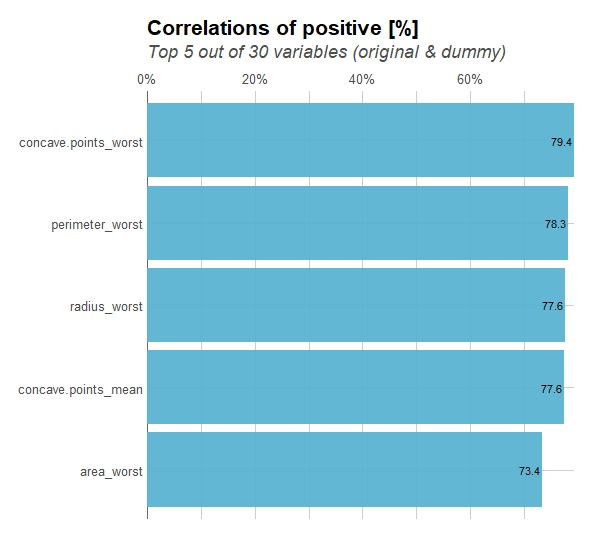

In [117]:
from IPython.display import Image
Image(r"C:\Users\sahil\Downloads\corroplotc.jpeg")

In [ ]:
#we are going to examine distribtuion among the top correlated variables with being positive for cancer
